In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('data/train_gr/train.csv')
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [4]:
df.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


### 1. strip out prefixes for if game was received for free, or was obtained from early access

In [43]:
#                    <prefix string> : <column name in the dataframe>
PREFIXES = {'Product received for free': 'received_free',
            'Early Access Review': 'is_early_access',
            'Access Review': 'is_early_access'
           }

def check_for_prefixes(review_text: str) -> dict[str, object]:
    d = { colname: False for colname in PREFIXES.values() }
    found_pfix = True
    
    while found_pfix:
        found_pfix = False
        for pfix, colname in PREFIXES.items():
            # not strictly necessary
            # if d[colname] == True: 
            #     break
            if review_text.startswith(pfix):
                review_text.removeprefix(pfix)
                d[colname] = True

    d['user_review'] = review_text
    return d

# probably more elegant way to do this exists
new_columns = pd.DataFrame(list(df['user_review'].apply(check_for_prefixes)))
df['user_review'] = new_columns['user_review']
df['is_early_access'] = new_columns['is_early_access']
df['received_free'] = new_columns['received_free']
print(df[ df['is_early_access'] ].info())
print(df[ df['received_free'] ].info())

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 5 to 17156
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        5733 non-null   int64  
 1   title            5733 non-null   object 
 2   year             5733 non-null   float64
 3   user_review      5733 non-null   object 
 4   user_suggestion  5733 non-null   int64  
 5   is_early_access  5733 non-null   bool   
 6   received_free    5733 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 279.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 172 to 17477
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        302 non-null    int64  
 1   title            302 non-null    object 
 2   year             302 non-null    float64
 3   user_review      302 non-null    object 
 4   user_suggestion  302 n

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [53]:
import vaderSentiment.vaderSentiment as vs
analyzer = vs.SentimentIntensityAnalyzer()

In [54]:
a = df['user_review'][0]
analyzer.polarity_scores(a)

{'neg': 0.121, 'neu': 0.774, 'pos': 0.106, 'compound': -0.7431}

In [ ]:
df['sentiment_score'] = df['user_review'].apply(analyzer
for review in reviews:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

In [69]:
ASCII_ART_CHARS = '░▄▀██'
def contains_ascii_art(review_text: str) -> tuple[bool, str]:
    if any(c in ASCII_ART_CHARS for c in review_text):
        return True, ''
    else:
        return False, review_text
    
a = df['user_review'].apply(contains_ascii_art)

In [80]:
df['contains_art'] = pd.Series(r[0] for r in a)
df['user_review'] = pd.Series(r[1] for r in a)

,contains_art,user_review
0,False,I'm scared and hearing creepy voices. So I'll...
1,False,"Best game, more better than Sam Pepper's YouTu..."
2,False,"A littly iffy on the controls, but once you kn..."
3,False,"Great game, fun and colorful and all that.A si..."
4,False,Not many games have the cute tag right next to...
5,False,"Early Access ReviewIt's pretty cute at first, ..."
6,False,Great game. it's a cute little horror game tha...
7,False,Spooky's Jump Scare Mansion is a Free Retro ma...
8,False,"Somewhere between light hearted, happy parody ..."
9,False,This game with its cute little out of the wall...


In [81]:
df[df['contains_art']]

,review_id,title,year,user_review,user_suggestion,is_early_access,received_free,contains_art
128,129,Spooky's Jump Scare Mansion,2017.0,,1,False,False,True
177,178,Spooky's Jump Scare Mansion,2015.0,,1,True,False,True
190,191,Spooky's Jump Scare Mansion,2017.0,,1,False,False,True
193,194,Spooky's Jump Scare Mansion,2015.0,,0,False,False,True
215,216,Spooky's Jump Scare Mansion,2017.0,,1,False,False,True
2009,2473,Path of Exile,2016.0,,1,False,False,True
2151,2615,Path of Exile,2017.0,,1,False,False,True
2777,3241,War Thunder,2018.0,,1,False,False,True
3662,4126,Team Fortress 2,2015.0,,1,False,False,True
3673,4137,Team Fortress 2,2012.0,,1,False,False,True


In [89]:
df['year'].unique()

array([2016., 2015., 2017., 2018., 2014.,   nan, 2012., 2013., 2011.])

In [102]:
df = df.dropna()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17316 entries, 0 to 17491
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17316 non-null  int64  
 1   title            17316 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17316 non-null  object 
 4   user_suggestion  17316 non-null  int64  
 5   is_early_access  17316 non-null  bool   
 6   received_free    17316 non-null  bool   
 7   contains_art     17316 non-null  bool   
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 862.4+ KB


NoneType

In [105]:
old_df = pd.read_csv('data/train_gr/train.csv')
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


### fake results figure

In [136]:
from math import floor, ceil
poss = df['user_suggestion'].sum()
negs = len(df) - poss
ratio_pos = 0.8
ratio_neg = 0.995
true_pos, false_neg = floor(ratio_pos * poss), ceil((1-ratio_pos) * poss)
true_neg, false_pos = floor(ratio_neg * negs), ceil((1-ratio_neg) * negs)

Text(0.5, 1.0, 'Confusion Matrix for Prediction of "user_recommendation"')

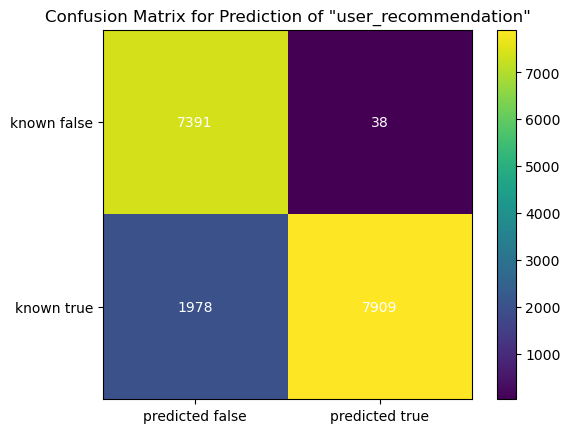

In [137]:
conf_matrix = np.array([[true_neg, false_pos], [false_neg, true_pos]])
plt.imshow(conf_matrix)
plt.colorbar()
for i in range(2):
    for j in range(2):
        text = plt.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="w")
        
plt.xticks([0, 1], ['predicted false', 'predicted true'])
plt.yticks([0, 1], ['known false', 'known true'])
plt.title('Confusion Matrix for Prediction of "user_recommendation"')                